https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

## Advantages
Because of its efficient and straightforward nature, __doesn't require high computation power, easy to implement, easily interpretable__, used widely by data analyst and scientist. Also, it __doesn't require scaling of features__. Logistic regression __provides a probability score for observations.__

## Disadvantages
Logistic regression is __not able to handle a large number of categorical features/variables__. It is __vulnerable to overfitting__. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression __will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.__

Approximately 70% of problems in Data Science are classification problems.  
There are lots of classification problems that are available, but the __logistics regression is common and is a useful regression method for solving the binary classification problem.__ 
Another category of classification is __Multinomial classification__, which handles the issues where multiple classes are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification.

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes.  
__It computes the probability of an event occurrence.__

__It is a special case of linear regression where the target variable is categorical in nature.__  
__It uses a log of odds as the dependent variable.__  
__Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.__

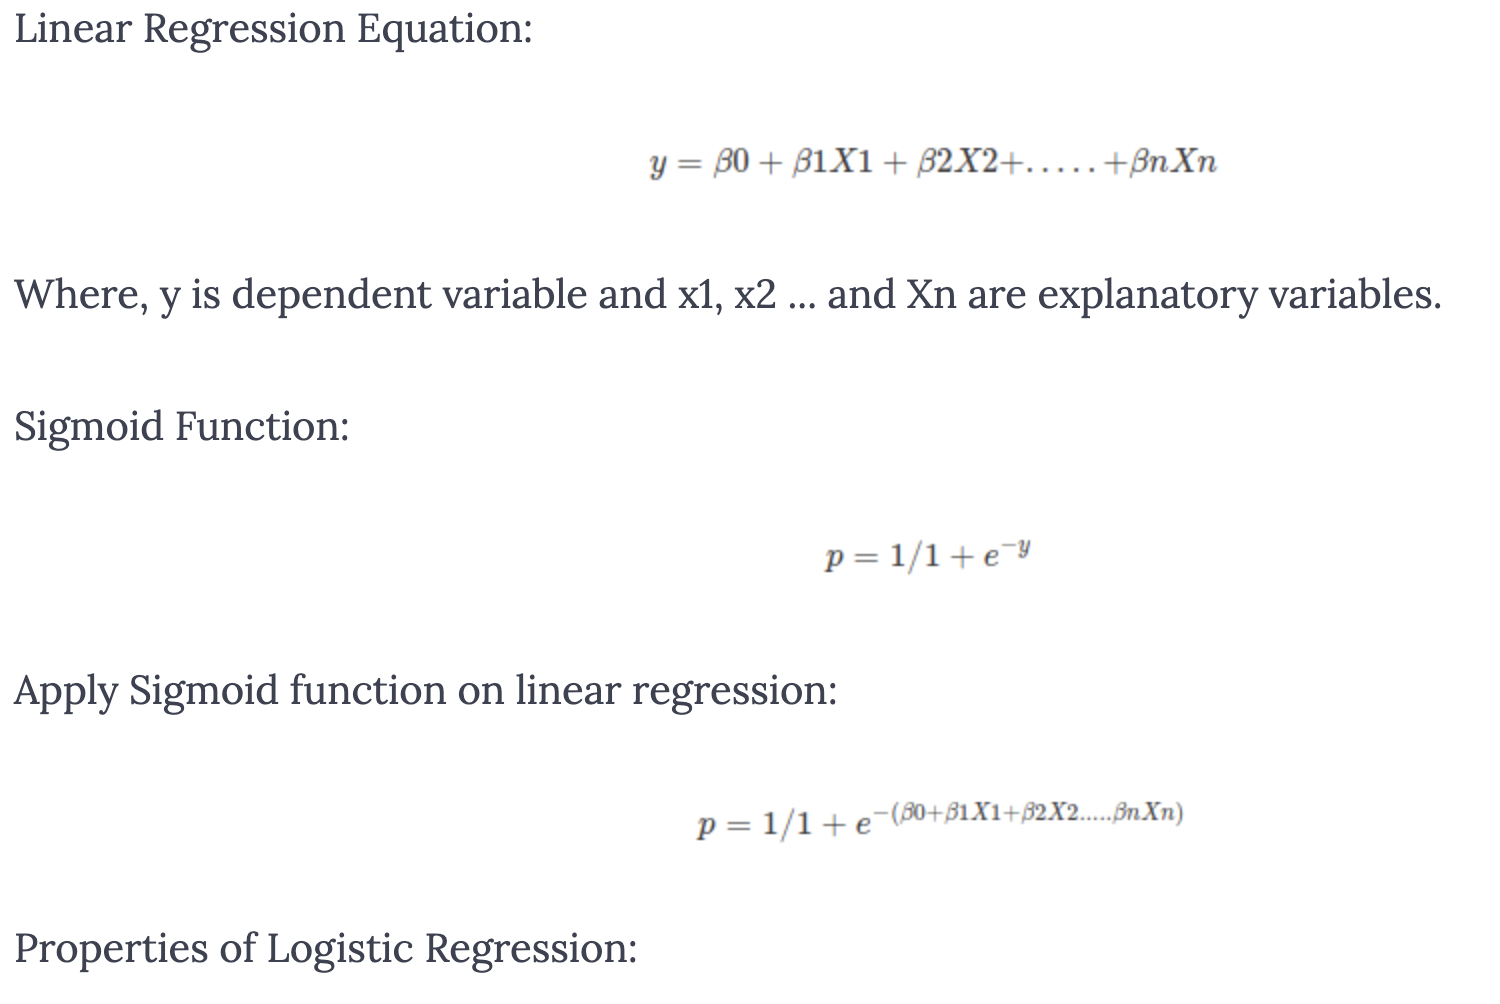

* The dependent variable in logistic regression follows Bernoulli Distribution.
* Estimation is done through maximum likelihood.
* No R Square, Model fitness is calculated through Concordance, KS-Statistics.

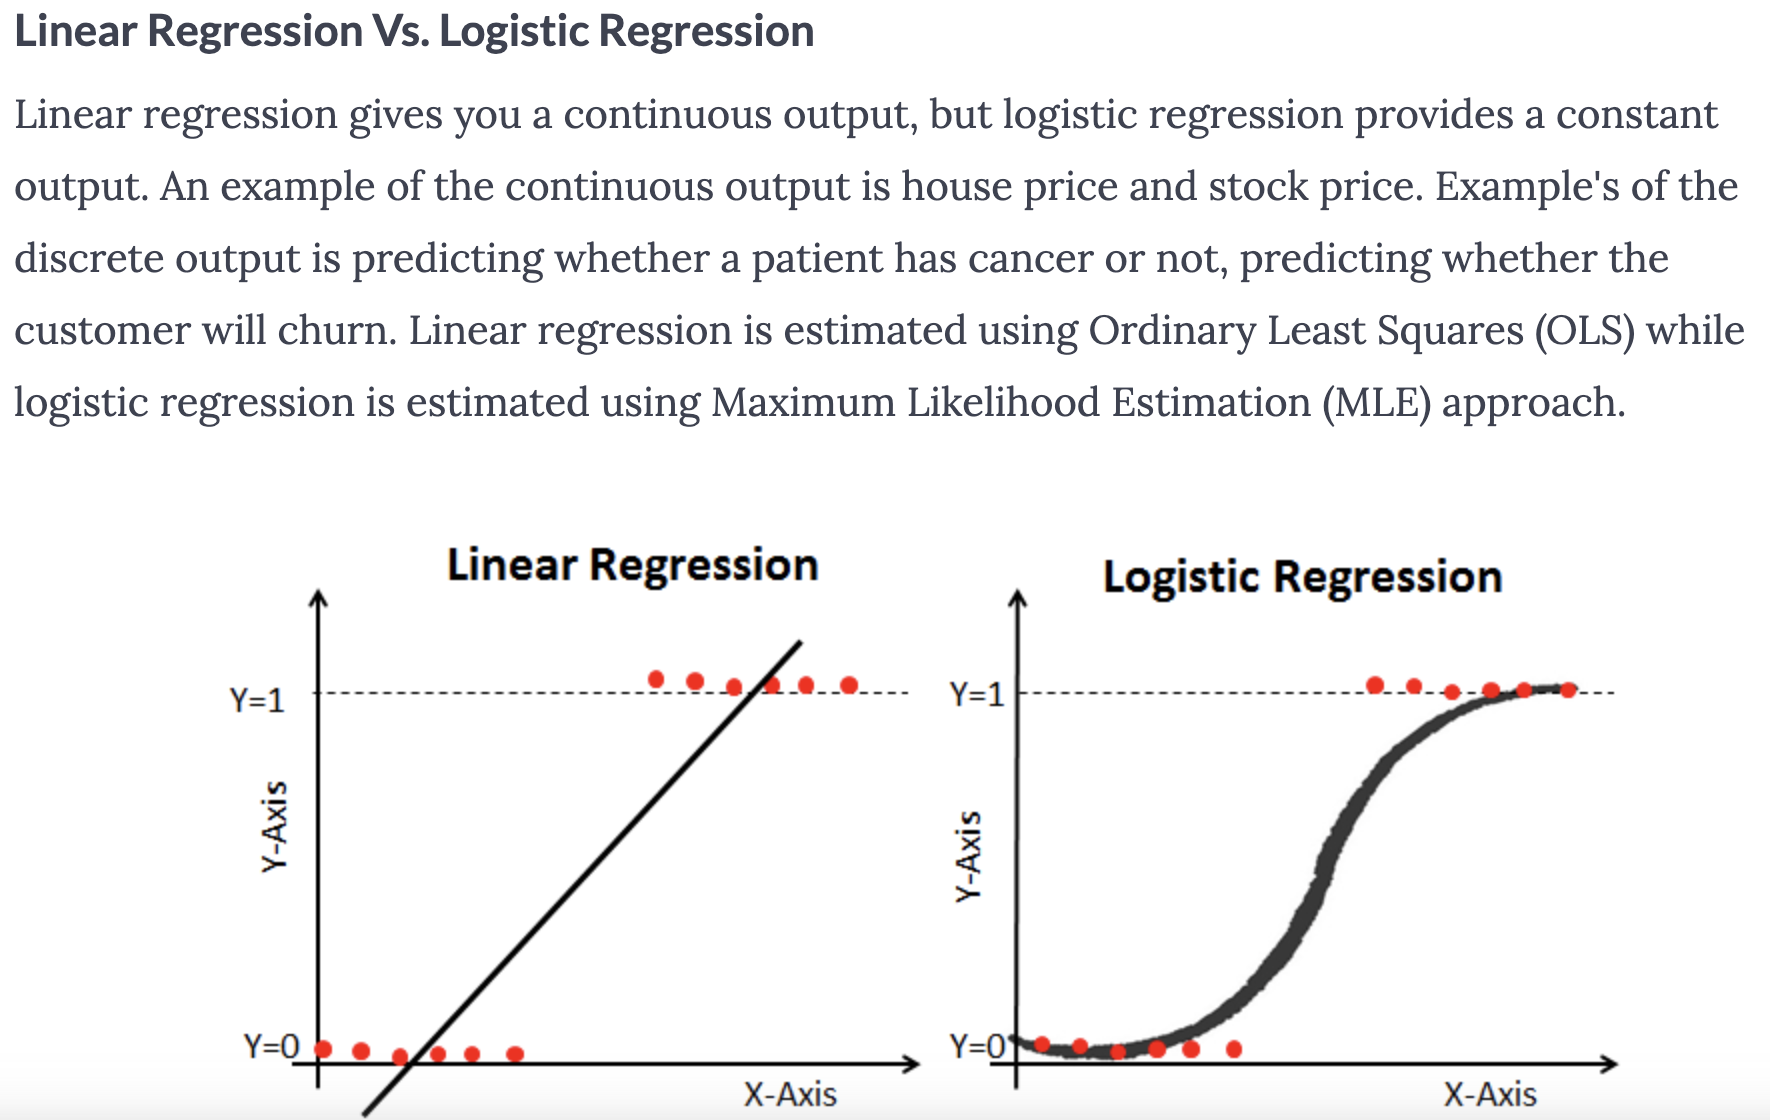

__Maximum Likelihood Estimation Vs. Least Square Method__  
The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.

__Sigmoid Function__  
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that __can take any real-valued number and map it into a value between 0 and 1__.  
If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.  
For example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

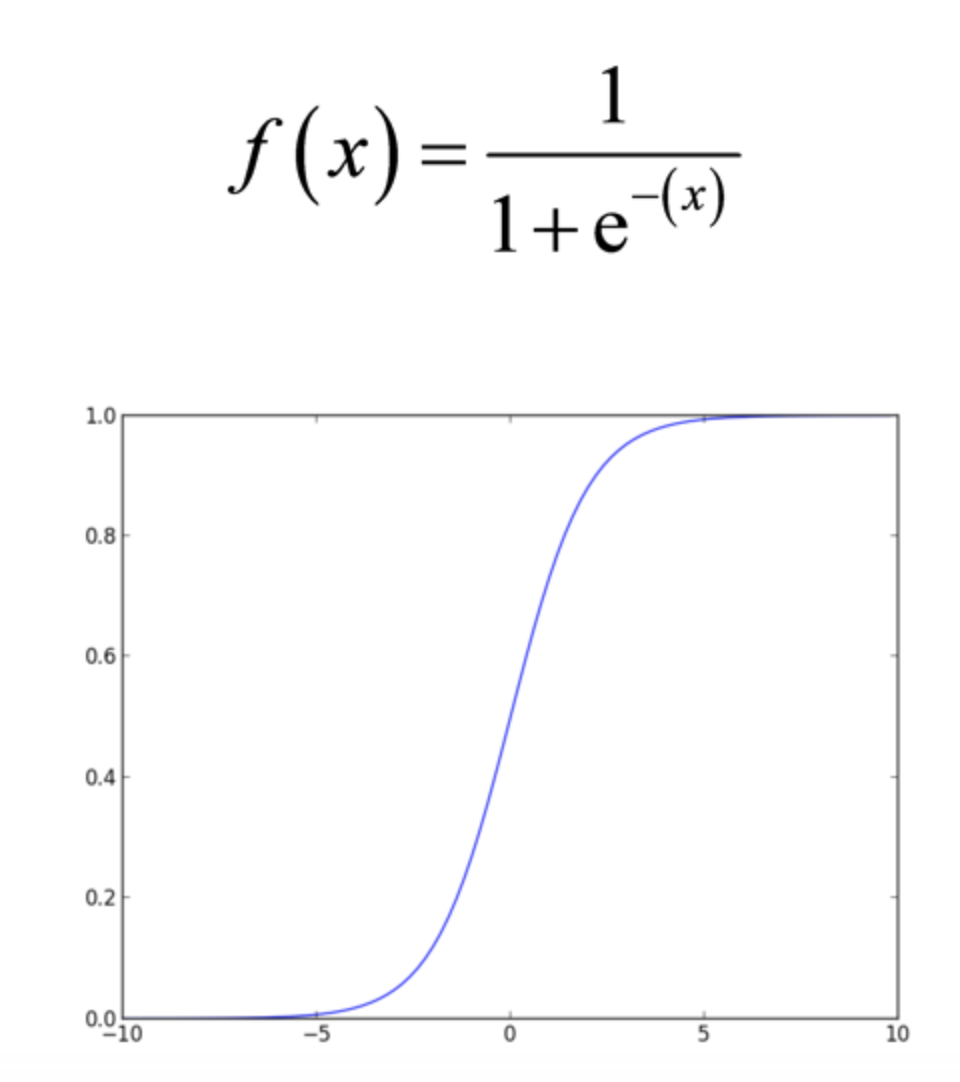

In [15]:
#not the same file from kaggle
#! curl -OL https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23628  100 23628    0     0  44665      0 --:--:-- --:--:-- --:--:-- 44581


In [23]:
import pandas as pd
pima = pd.read_csv("pima-indians-diabetes.csv")
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns=col_names

In [24]:
pima.sample(4)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
602,1,124,74,36,0,27.8,0.100,30,0
36,11,138,76,0,0,33.2,0.420,35,0
244,2,146,76,35,194,38.2,0.329,29,0
434,1,90,68,8,0,24.5,1.138,36,0


In [38]:
pima.groupby('label').mean()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [36]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


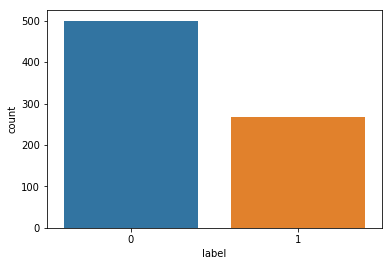

In [40]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='label', data=pima)

In [41]:
pima['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

## split dataset in features and target variable


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [44]:
X = pima.loc[:, pima.columns != 'label']
y = pima.loc[:, pima.columns == 'label']

## split dataset in train and test


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [50]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train.values.ravel())
y_pred=logreg.predict(X_test)


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [52]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

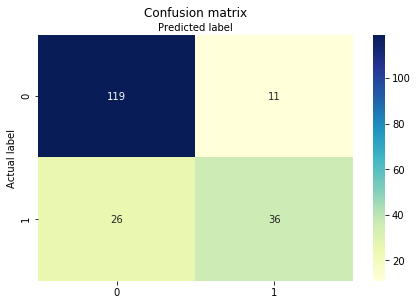

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


In [57]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

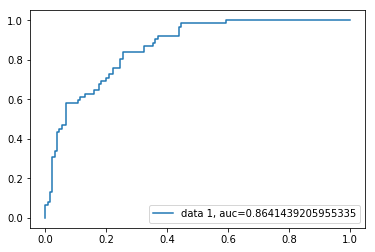

In [58]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
model_result=logit_model.fit()
print(model_result.summary2())

Optimization terminated successfully.
         Current function value: 0.622286
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.046     
Dependent Variable: label            AIC:              732.8739  
Date:               2019-12-26 14:41 BIC:              767.7228  
No. Observations:   576              Log-Likelihood:   -358.44   
Df Model:           7                LL-Null:          -375.58   
Df Residuals:       568              LLR p-value:      1.5234e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
pregnant       0.0958    0.0318   3.0164  0.0026   0.0336   0.1580
glucose        0.0115    0.0031   3.6587  0.0003   0.0053   0.

In [76]:
pima.loc[:, pima.columns != 'label'].columns.tolist()

['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

In [79]:
np.around(logreg.coef_, 3).ravel().tolist()

[0.083000,
 0.026000,
 -0.016000,
 0.006000,
 -0.001000,
 0.054000,
 0.601000,
 0.012000]

In [84]:
df=pd.DataFrame(zip(pima.loc[:, pima.columns != 'label'].columns.tolist(),np.around(logreg.coef_, 3).ravel().tolist()))

In [85]:
df

,0,1
0,pregnant,0.083
1,glucose,0.026
2,bp,-0.016
3,skin,0.006
4,insulin,-0.001
5,bmi,0.054
6,pedigree,0.601
7,age,0.012
